# Fraud Detection Analysis and Prediction for Credit Card

This project is completed by myself for the purpose of imporving my python and machine learning skills. 

**the dataset can be found in this link：https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud**



---


the dataset contain around 300,000 records and 31 features. this dataset derived from records of a european credit card holder in September 2013. the current feature were transformed by PCA transformation and orginal features names are replaced by v1 to v28 due to the confidientiality. the only two feature remain orginal is the time and amount.


---


this project consist of three parts
1.   install packages and import dataset
2.   exploratory data analysis
3.   modeling building and performance comparsion



# PART 1: INSTALL PACKAGES AND IMPORT DATASET

Here I installed basic packages for data analysis. I will be install more package in model building part.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# please use this dataset
# direct import the dataset from the local device
'''
from google.colab import files
uploaded = files.upload()
'''

'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [3]:

from google.colab import drive

drive.mount('/content/drive')

!ls "/content/drive/My Drive/laioffer/laioffer project/Fraud detection code class 60/fraudData"

Mounted at /content/drive
creditcard.csv	imbalancedFraudDF.csv  IpAddress_to_Country.csv


In [4]:
creditcardDF = pd.read_csv('/content/drive/My Drive/laioffer/laioffer project/Fraud detection code class 60/fraudData/creditcard.csv')
creditcardDF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Part 2: EXPLORATORY DATA ANALYSIS

> checking all feature for any null values

In [5]:
creditcardDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28



> check statistical information in each columns



In [6]:
'''
!pip install tabulate
from tabulate import tabulate
'''

'\n!pip install tabulate\nfrom tabulate import tabulate\n'

In [7]:
#print(tabulate(creditcardDF.describe(),headers =[i] for i in list(creditcardDF.columns),tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".5f"))

In [8]:
creditcardDF.describe().applymap("{0:.5f}".format)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,...,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,...,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,...,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,...,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,...,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,...,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,...,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,...,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000




> Distribution of the label column

the plot below showed clearly how under sampling the fraud transactions are compare to normal transaction

In [9]:
creditcardDF['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

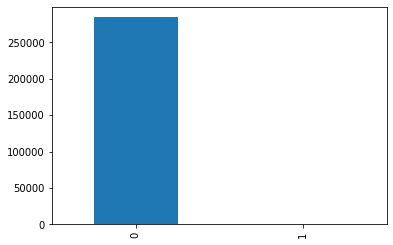

In [10]:
creditcardDF['Class'] = creditcardDF['Class'].astype('category')
freq_class = creditcardDF["Class"].value_counts()
freq_class.plot.bar()



> this plot shows one plot with the data with outliers in the label column(left). One shows data withouot outliers in label column(right)



<AxesSubplot:xlabel='Class', ylabel='Amount'>

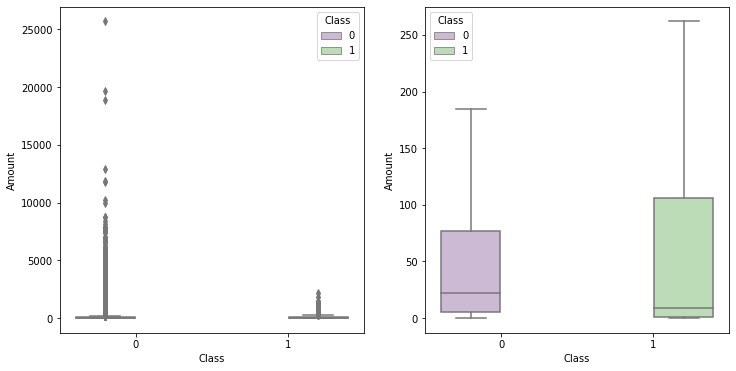

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'Amount', hue = 'Class', data = creditcardDF, palette = "PRGn")

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y ='Amount', hue = 'Class', data= creditcardDF, palette= 'PRGn', showfliers = False)

> below showed the statistics of each fraud transactions and non-fraud transactions based on the amount.

I have notice something interesting after compare between them.


*   fraud transaction is lower at 25% and 50% percentile in fraud transaction versus normal transaction. this might because that theives are testing the cards' usbility and doesn't want owner to be noticed. So the amount is small 

*   fraud transaction is higher in mean and 75 percentile compare to normal transaction. This probably can be explained by that theives is actually spending the money in the card



In [12]:
tmp = creditcardDF[['Amount', 'Class']]
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

print(class_0.describe(), '\n')
print(class_1.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


below correlation heatmap showed that:

*   time has a stronger correlation between V3, 11, 25
*   amount has a stronger correlation between V1, 2, 3, 5, 6, 7, 20



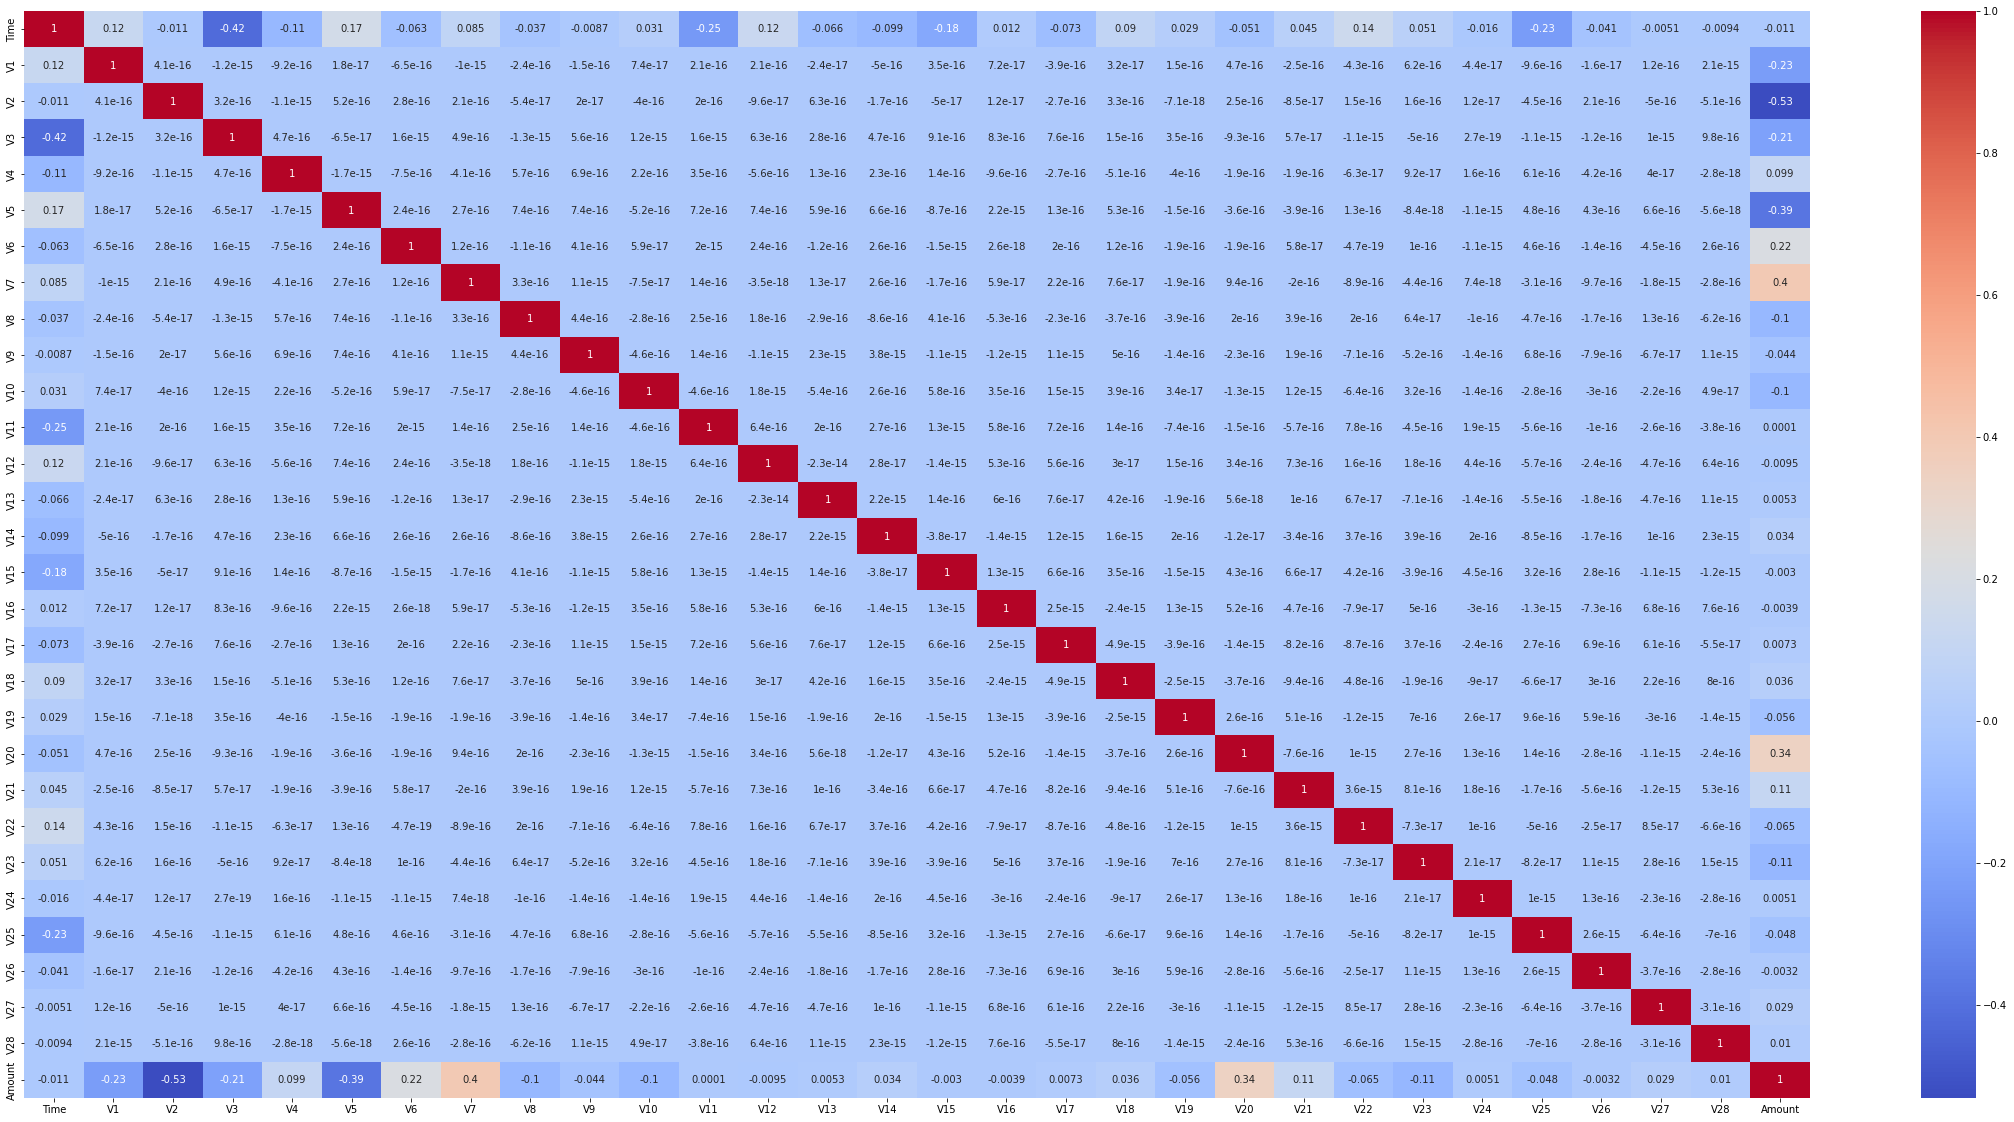

In [13]:
corr = creditcardDF.corr()
plt.figure(figsize=(40, 20))
sns.heatmap(corr, cmap = 'coolwarm', annot =True)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

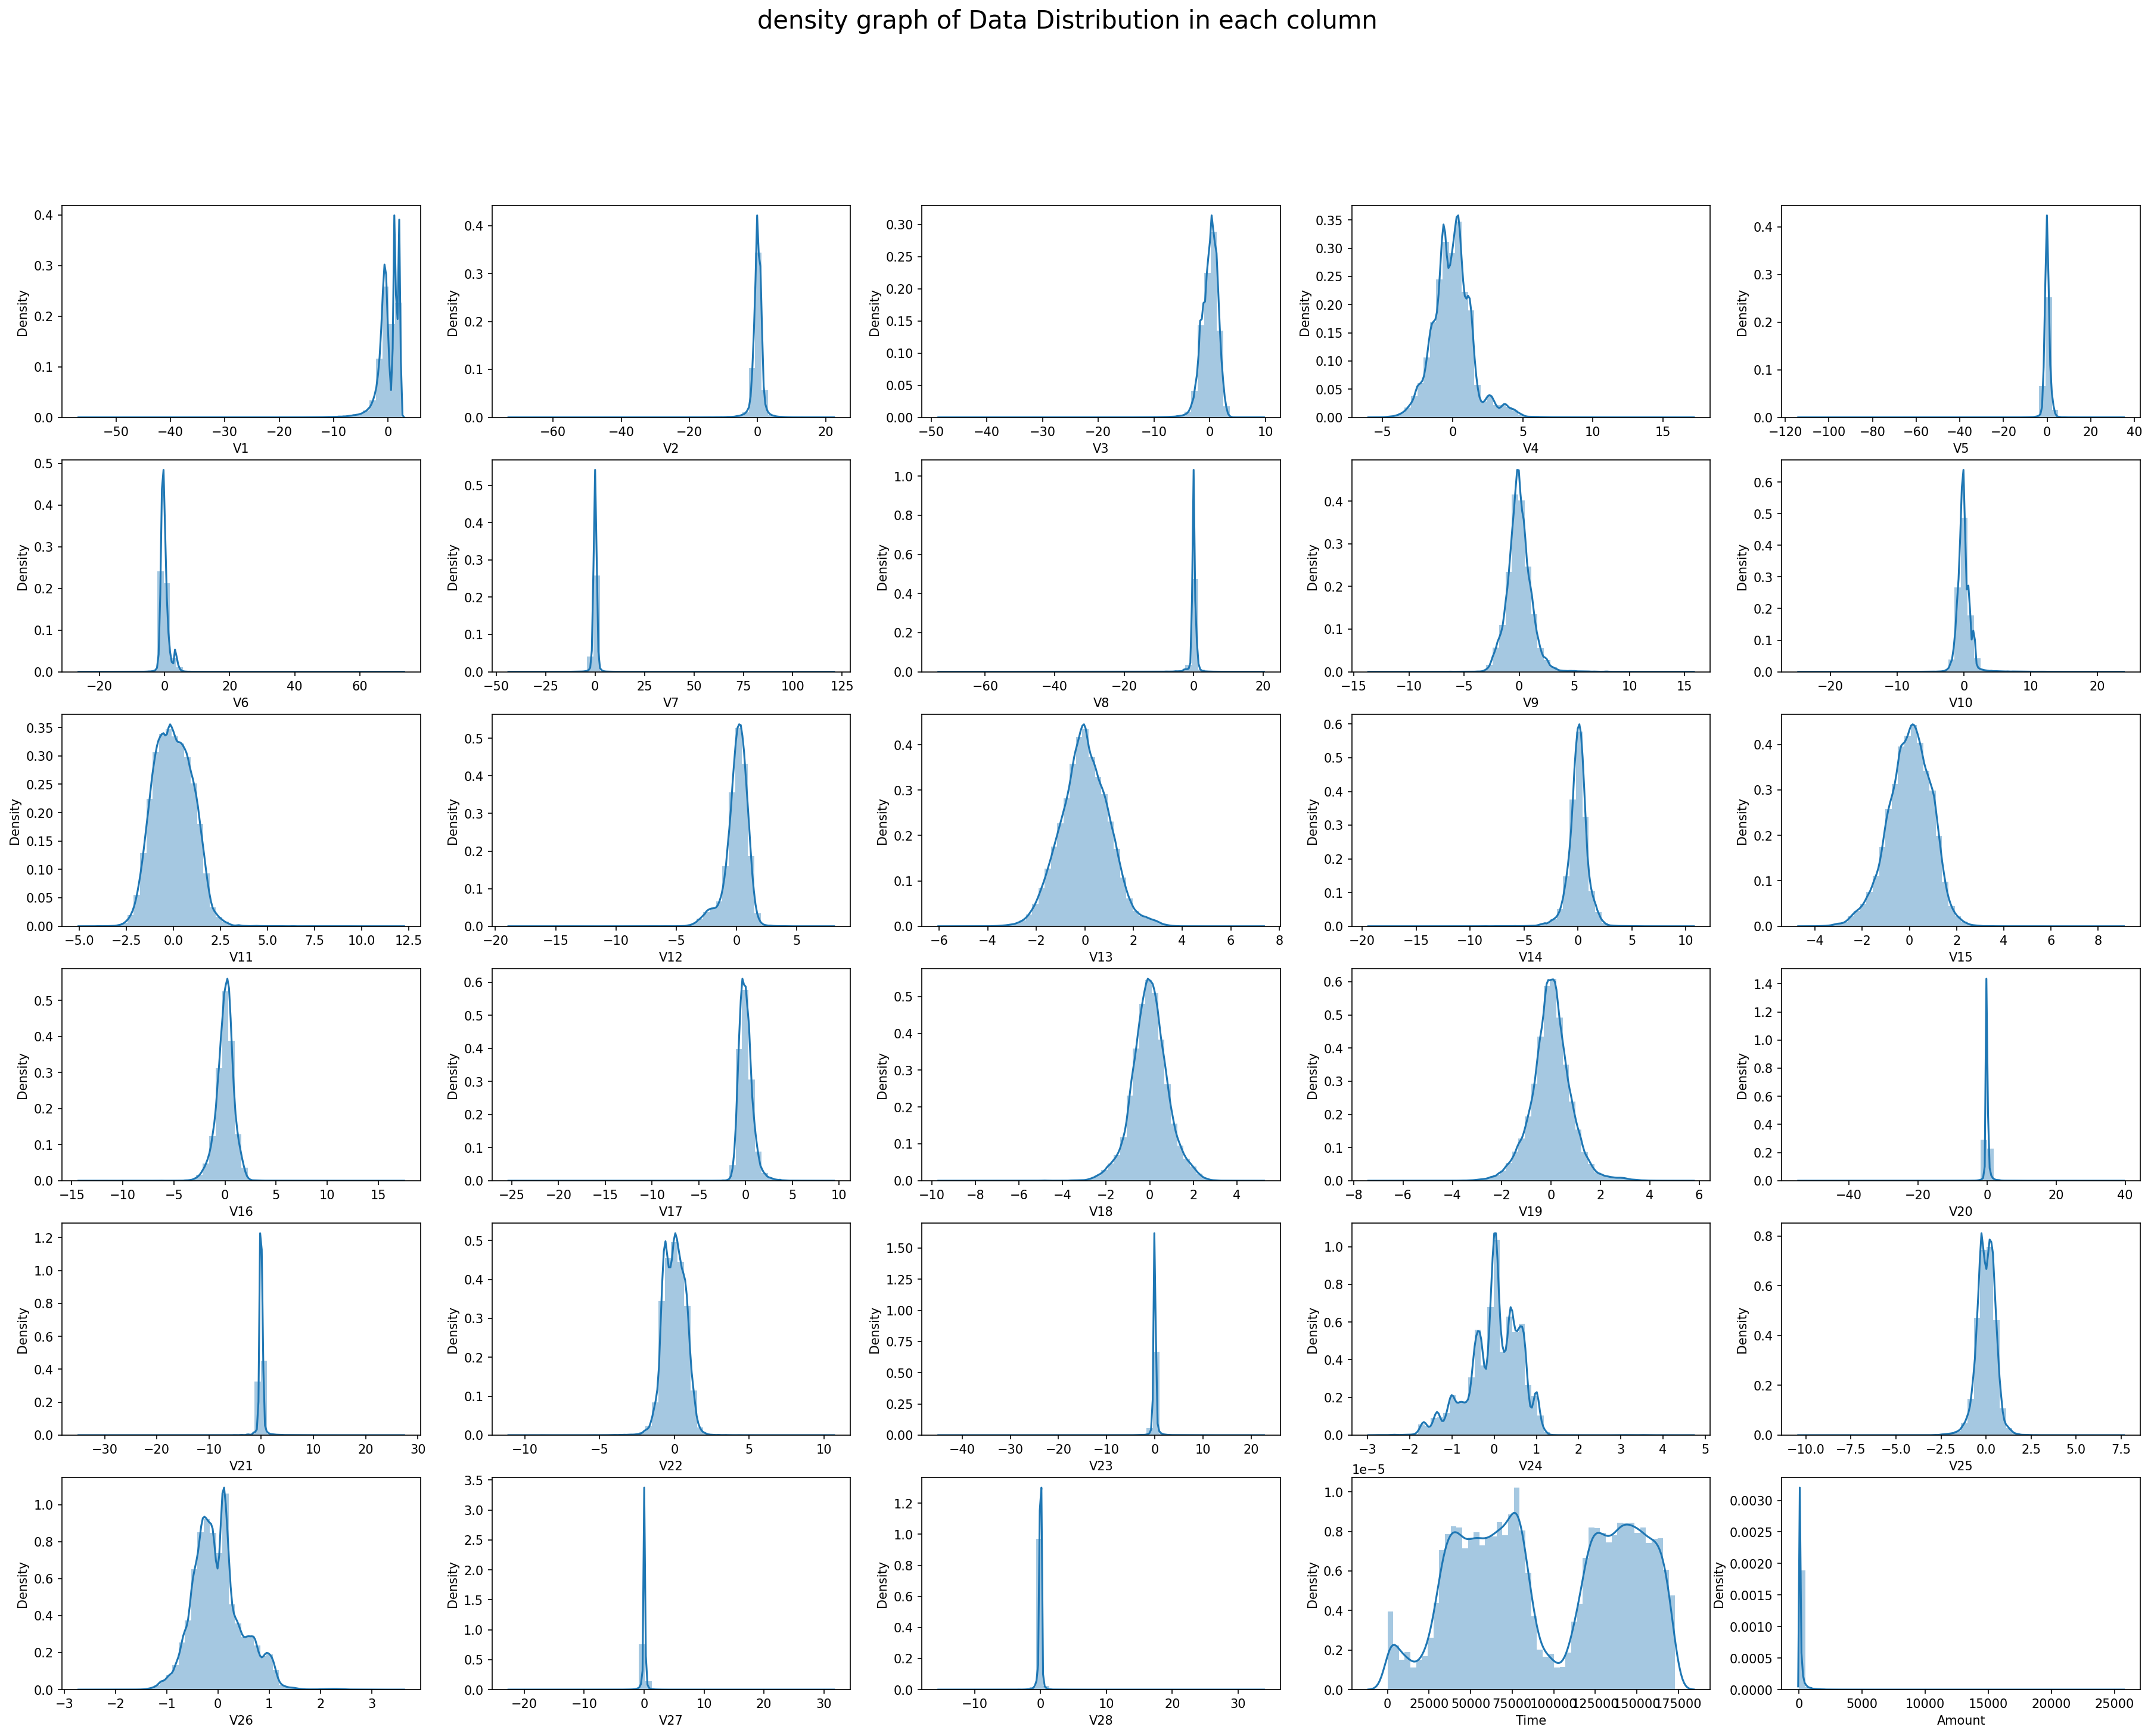

In [14]:
plt.figure(figsize=(30, 22), dpi=150)

plt.subplot(6,5,1)
sns.distplot(creditcardDF.V1)

plt.subplot(6,5,2)
sns.distplot(creditcardDF.V2)

plt.subplot(6,5,3)
sns.distplot(creditcardDF.V3)

plt.subplot(6,5,4)
sns.distplot(creditcardDF.V4)

plt.subplot(6,5,5)
sns.distplot(creditcardDF.V5)

plt.subplot(6,5,6)
sns.distplot(creditcardDF.V6)

plt.subplot(6,5,7)
sns.distplot(creditcardDF.V7)

plt.subplot(6,5,8)
sns.distplot(creditcardDF.V8)

plt.subplot(6,5,9)
sns.distplot(creditcardDF.V9)

plt.subplot(6,5,10)
sns.distplot(creditcardDF.V10)

plt.subplot(6,5,11)
sns.distplot(creditcardDF.V11)

plt.subplot(6,5,12)
sns.distplot(creditcardDF.V12)

plt.subplot(6,5,13)
sns.distplot(creditcardDF.V13)

plt.subplot(6,5,14)
sns.distplot(creditcardDF.V14)

plt.subplot(6,5,15)
sns.distplot(creditcardDF.V15)

plt.subplot(6,5,16)
sns.distplot(creditcardDF.V16)

plt.subplot(6,5,17)
sns.distplot(creditcardDF.V17)

plt.subplot(6,5,18)
sns.distplot(creditcardDF.V18)

plt.subplot(6,5,19)
sns.distplot(creditcardDF.V19)

plt.subplot(6,5,20)
sns.distplot(creditcardDF.V20)

plt.subplot(6,5,21)
sns.distplot(creditcardDF.V21)

plt.subplot(6,5,22)
sns.distplot(creditcardDF.V22)

plt.subplot(6,5,23)
sns.distplot(creditcardDF.V23)

plt.subplot(6,5,24)
sns.distplot(creditcardDF.V24)

plt.subplot(6,5,25)
sns.distplot(creditcardDF.V25)

plt.subplot(6,5,26)
sns.distplot(creditcardDF.V26)

plt.subplot(6,5,27)
sns.distplot(creditcardDF.V27)


plt.subplot(6,5,28)
sns.distplot(creditcardDF.V28)

plt.subplot(6,5,29)
sns.distplot(creditcardDF.Time)

plt.subplot(6,5,30)
sns.distplot(creditcardDF.Amount)

plt.suptitle("density graph of Data Distribution in each column", fontsize=20)
plt.show()



> checking the distribution of time

originally 'Time' is in seconds. Using python built in divmod() function, I converted it into miunts for better visulizations

original 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. so,I can't determine if the first transaction is from the start of the day or middle of the day

but looking at the blue line(normal transactions), there are two peaks where transaction happens most. So I assume, those are the person is active which is during daytime.

In [15]:
class_0 = pd.DataFrame(creditcardDF.loc[creditcardDF['Class'] == 0]['Time'])
class_1 = pd.DataFrame(creditcardDF.loc[creditcardDF['Class'] == 1]['Time'])

In [16]:
def conversion(dataset):

  minutes = []
  #convert to minutes
  for i in dataset['Time']:
    mm, ss = divmod(i, 60)
    minutes.append(int(mm))

  dataset['miuntes'] = minutes
  

conversion(class_0)
conversion(class_1)


In [17]:
'''
from datetime import timedelta

time = []
for i in class_0['Time']:
  td = timedelta(seconds=i)
  time.append(td)

class_0['time'] = time
class_0
'''

"\nfrom datetime import timedelta\n\ntime = []\nfor i in class_0['Time']:\n  td = timedelta(seconds=i)\n  time.append(td)\n\nclass_0['time'] = time\nclass_0\n"

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


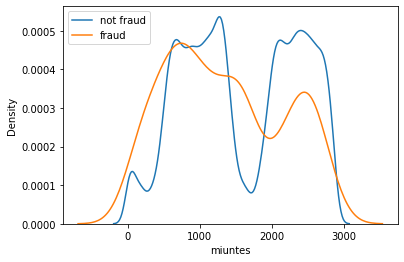

In [18]:
sns.distplot(class_0['miuntes'], hist = False, label = "not fraud")
sns.distplot(class_1['miuntes'], hist = False, label = "fraud")
plt.legend()
#checking fraud and non-fraud activity through time

# part 3: training model

I trained multiple Machine learning models in order to find the best type of model in determine Fraud transaction.

models I used


*   Logistic Regression
*   K Nearest Neighbors
*   Random Forest
*   AdaBoost
*   Gradient Boosting
*   Decision Tree
*   XGBOOST

## 3.1 model training

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

feature = creditcardDF.drop(columns = ['Class'], axis = 1)
label = creditcardDF['Class']

trainX, testX, trainY, testY = train_test_split(feature, label, test_size= 0.3, random_state = 15)




> importing models



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost



> IMPORT parameter tuning method(grid search), 

> performance metrics





In [21]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.utils.validation import Parameter
def model_trainer(model, Parameter, train_x, train_y, test_x):
  clf = GridSearchCV(model, 
                     param_grid= Parameter, 
                     cv = 10,
                     verbose= 0)
  clf.fit(train_x, train_y)
  predict_outcome = clf.predict(test_x)
  metricscore = [accuracy_score(testY, predict_outcome),precision_score(testY, predict_outcome),recall_score(testY, predict_outcome),f1_score(testY, predict_outcome),(roc_auc_score(testY, predict_outcome) * 100)]
  return metricscore, predict_outcome



In [23]:
from pandas.core.common import random_state
'''
this piece of code was meant to find the best max_iter parameter in this model. but, since the run time is way too long, so I decided to not get ride of it.
the defualt max_iter will do just fine

iteration = []
for i in range(100, 120, 1):
  iteration.append(i)
'''
lr = LogisticRegression(random_state= 40)
lr_param = {'penalty': ['l1', 'l2'],
         'solver': ['newton-cg', 'lbfgs', 'liblinear'],
         'verbose': [0]}

lr_metrics, lr_outcome = model_trainer(lr, lr_param, trainX, trainY, testX)

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarni

In [24]:
knn = KNeighborsClassifier(n_neighbors= 5)

nNeighbors = []
for i in range(1, 10):
  nNeighbors.append(i)

knn_param = {'n_neighbors': nNeighbors,
             'weights': ['uniform', 'distance']}
knn_metrics, knn_outcome = model_trainer(knn, knn_param, trainX, trainY, testX)

In [ ]:
rdf = RandomForestClassifier(random_state = 10)
rdf_param={'n_estimators':[55,56,57,58,59,60,61,62,63,64,65],
            'max_depth':[15,16,17,18,19,20,21]}
rdf_metrics, rdf_outcome = model_trainer(rdf, rdf_param, trainX, trainY, testX)

In [ ]:
ABC = AdaBoostClassifier()
abc_param = { 'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1]}
ABC_metrics, ABC_outcome = model_trainer(ABC, abc_param, trainX, trainY, testX)

In [ ]:
decisiontree = DecisionTreeClassifier()
dt_param = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
dt_metrics, dt_outcome = model_trainer(decisiontree, dt_param, trainX, trainY, testX)

In [ ]:

xgb = xgboost.XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)
xgb_param = {'max_depth': range (2, 10, 1),
             'n_estimators': range(60, 220, 40),
             'learning_rate': [0.1, 0.01, 0.05]

}
xgb_metircs, xgb_outcome = model_trainer(xgb, xgb_param, trainX, trainY, testX)

## 3.1 Model performance metrics

### 3.1.1 comparsion table

In [ ]:
met = ['Accuracy','Precision','Recall','F1_score','AUROC']
dic = {"metrics": met, "logisticRegression" : lr_metrics, "KNN": knn_metrics, "RandomForest" : rdf_metrics, "AdaBoostClassifier" : ABC_metrics, "decisionTree": dt_metrics, "XGBoost": xgb_metircs}
model_eval = pd.DataFrame(dic)
model_eval

### 3.1.2 confusion matrix

In [ ]:
#Confusion Matrix for Logistic Regression
plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
cm_lr = confusion_matrix(testY, lr_outcome)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_lr, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Confusion Matrix for KNN
plt.figure(figsize=(10,7))
plt.subplot(2,3,2)
cm_knn = confusion_matrix(testY, knn_outcome)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_knn, annot = True, fmt = 'g')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.set_title('Confusion Matrix - KNN')
ax.xaxis.set_ticklabels(['Genuine', 'Fraud'])
ax.yaxis.set_ticklabels(['Geniune', 'Fraud'])
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(10,7))
plt.subplot(2,3,3)
cm_rdf = confusion_matrix(testY, rdf_outcome)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_rdf, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Confusion Matrix for ABC
plt.figure(figsize=(10,7))
plt.subplot(2,3,3)
cm_abc = confusion_matrix(testY, ABC_outcome)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_abc, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Confusion Matrix for Decision Tree
plt.figure(figsize=(10,7))
plt.subplot(2,3,4)
cm_dt = confusion_matrix(testY, dt_outcome)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_dt, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Confusion Matrix for XGB
plt.figure(figsize=(10,7))
plt.subplot(2,3,4)
cm_xgb = confusion_matrix(testY, xgb_outcome)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_xgb, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

## 3.2 SMOTE modfied data & model training



> SMOTE is used to address the problem of imbalanced datasets where the number of samples in one class is significantly lower than the other class. In such cases, traditional machine learning algorithms can perform poorly because they are biased towards the majority class and fail to learn patterns from the minority class.

![picture](https://drive.google.com/uc?id=1HvE_cCi9yBMLITUIX-lHohU9kdH8fjPL)


In [ ]:
smote_trainX, smote_trainY = SMOTE().fit_resample(trainX, trainY)

In [ ]:
trainY.value_counts()

In [ ]:
print("data size after oversampling: ")
print("- - - - - - - - - - - - - - - - -")
print("trainX size:  ", smote_trainX.shape, " : ", '%s%%'%round((len(smote_trainX)/(len(smote_trainX) + len(testX))) * 100))
print("testX size:   ", testX.shape, "  : ", "%s%%"%round((len(testX)/(len(smote_trainX) + len(testX))) * 100))
print("- - - - - - - - - - - - - - - - -")
print("trainY size:  ", smote_trainY.shape, "    : ", "%s%%"%round((len(smote_trainY)/(len(smote_trainY) + len(testY))) * 100))
print("testY size:   ", testY.shape, "     : ", "%s%%"%round((len(testY)/(len(smote_trainY) + len(testY))) * 100))

In [ ]:
#model training with smote modified data
lr_metrics, smote_outcome_lr = model_trainer(lr, lr_param, smote_trainX, smote_trainY, testX)
knn_metrics, smote_outcome_knn = model_trainer(knn, knn_param, smote_trainX, smote_trainY, testX)
rdf_metrics, smote_outcome_rdf = model_trainer(rdf, rdf_param, smote_trainX, smote_trainY, testX)
ABC_metrics, smote_outcome_abc = model_trainer(ABC, abc_param, smote_trainX, smote_trainY, testX)
dt_metrics, smote_outcome_dt = model_trainer(decisiontree, dt_param, smote_trainX, smote_trainY, testX)
xgb_metircs, smote_outcome_xgb = model_trainer(xgb, xgb_param, smote_trainX, smote_trainY, testX)

### 3.2.1 comparsion table

In [ ]:
met = ['Accuracy','Precision','Recall','F1_score','AUROC']
dic_smote = {"metrics": met, "logisticRegression" : lr_metrics, "KNN": knn_metrics, "RandomForest" : rdf_metrics, "AdaBoostClassifier" : ABC_metrics, "decisionTree": dt_metrics, "XGBoost": xgb_metircs}
model_eval_smote = pd.DataFrame(dic_smote)
model_eval_smote

In [ ]:
model_eval

### 3.2.2 confusion matrix 

In [ ]:
#Confusion Matrix for Logistic Regression
plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
cm_lr = confusion_matrix(testY, smote_outcome_lr)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_lr, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Confusion Matrix for KNN
plt.figure(figsize=(10,7))
plt.subplot(2,3,2)
cm_knn = confusion_matrix(testY, smote_outcome_knn)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_knn, annot = True, fmt = 'g')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Actual Value')
ax.set_title('Confusion Matrix - KNN')
ax.xaxis.set_ticklabels(['Genuine', 'Fraud'])
ax.yaxis.set_ticklabels(['Geniune', 'Fraud'])
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(10,7))
plt.subplot(2,3,3)
cm_rdf = confusion_matrix(testY, smote_outcome_rdf)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_rdf, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Confusion Matrix for ABC
plt.figure(figsize=(10,7))
plt.subplot(2,3,3)
cm_abc = confusion_matrix(testY, smote_outcome_abc)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_abc, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Confusion Matrix for Decision Tree
plt.figure(figsize=(10,7))
plt.subplot(2,3,4)
cm_dt = confusion_matrix(testY, smote_outcome_dt)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_dt, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Confusion Matrix for XGB
plt.figure(figsize=(10,7))
plt.subplot(2,3,4)
cm_xgb = confusion_matrix(testY, smote_outcome_xgb)
# Visualization
ax = plt.subplot()
sns.heatmap(cm_xgb, annot=True, fmt='g')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

# Part 4: Reference


*  21. formatted output. (n.d.). Retrieved March 13, 2023, from https://python-course.eu/python-tutorial/formatted-output.php
*  Thai, K. (2022, July 26). How to easily print and format tables in Python. 
Retrieved March 13, 2023, from https://blog.devgenius.io/how-to-easily-print-and-format-tables-in-python-18bbe2e59f5f#2d3a
*  Vishal. (2022, February 17). Python convert seconds to HH:MM:SS (hours, minutes, and seconds). Retrieved March 13, 2023, from https://pynative.com/python-convert-seconds-to-hhmmss/
*  William_Liwilliam_Li 1322 bronze badges, & CorralienCorralien 91.6k88 gold badges2626 silver badges4646 bronze badges. (1969, December 28). Formatting .dscribe() output in Python. Retrieved March 13, 2023, from https://stackoverflow.com/questions/75689919/formatting-dscribe-output-in-python/75690053#75690053

